In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

Unnamed: 0  rating       date         variation  \
0           0       5  31-Jul-18  Charcoal Fabric    
1           1       5  31-Jul-18  Charcoal Fabric    
2           2       4  31-Jul-18    Walnut Finish    
3           3       5  31-Jul-18  Charcoal Fabric    
4           4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [4]:
data =data.dropna()

In [5]:
data

Unnamed: 0  rating       date         variation  \
0              0       5  31-Jul-18  Charcoal Fabric    
1              1       5  31-Jul-18  Charcoal Fabric    
2              2       4  31-Jul-18    Walnut Finish    
3              3       5  31-Jul-18  Charcoal Fabric    
4              4       5  31-Jul-18  Charcoal Fabric    
...          ...     ...        ...               ...   
3145        3145       5  30-Jul-18        Black  Dot   
3146        3146       5  30-Jul-18        Black  Dot   
3147        3147       5  30-Jul-18        Black  Dot   
3148        3148       5  30-Jul-18        White  Dot   
3149        3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 6 columns]

In [6]:
conda install nltk

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [8]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [10]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
data['verified_reviews'].head(5).apply(text_process)

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
Name: verified_reviews, dtype: object

In [12]:
data.head()

Unnamed: 0  rating       date         variation  \
0           0       5  31-Jul-18  Charcoal Fabric    
1           1       5  31-Jul-18  Charcoal Fabric    
2           2       4  31-Jul-18    Walnut Finish    
3           3       5  31-Jul-18  Charcoal Fabric    
4           4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:

bow_transformer = CountVectorizer(analyzer=text_process).fit(data['verified_reviews'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

5211


In [15]:
v_review = data['verified_reviews'][3]

In [16]:
print(v_review)

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [17]:
bow4 = bow_transformer.transform([v_review])
print(bow4)
print(bow4.shape)

  (0, 115)	1
  (0, 1714)	1
  (0, 1927)	1
  (0, 2144)	1
  (0, 2588)	1
  (0, 2610)	1
  (0, 3134)	1
  (0, 3163)	1
  (0, 3168)	1
  (0, 3234)	1
  (0, 3401)	1
  (0, 3462)	1
  (0, 3530)	1
  (0, 3722)	1
  (0, 3725)	1
  (0, 4413)	1
  (0, 4700)	1
  (0, 5042)	1
  (0, 5145)	1
(1, 5211)


In [18]:
print(bow_transformer.get_feature_names()[4413])


sound


C:\Users\amant\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
review_bow = bow_transformer.transform(data['verified_reviews'])

In [20]:
print('Shape of Sparse Matrix: ', review_bow.shape)
print('Amount of Non-Zero occurences: ', review_bow.nnz)

Shape of Sparse Matrix:  (3150, 5211)
Amount of Non-Zero occurences:  37628


In [21]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5145)	0.32579274099472205
  (0, 5042)	0.17567899812415189
  (0, 4700)	0.18130724126137343
  (0, 4413)	0.14592461645148008
  (0, 3725)	0.21146664989024153
  (0, 3722)	0.165522933528074
  (0, 3530)	0.22023198141602277
  (0, 3462)	0.2054356432049131
  (0, 3401)	0.12679395765865004
  (0, 3234)	0.20184357985356158
  (0, 3168)	0.12963382552375344
  (0, 3163)	0.19645906920149933
  (0, 3134)	0.296347311772669
  (0, 2610)	0.24163826388472026
  (0, 2588)	0.18500355196495558
  (0, 2144)	0.35523817021677523
  (0, 1927)	0.20801102410650965
  (0, 1714)	0.35523817021677523
  (0, 115)	0.24019809970547962


In [23]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])


6.570568491969274


In [24]:
messages_tfidf = tfidf_transformer.transform(review_bow)
print(messages_tfidf.shape)

(3150, 5211)


In [25]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, feedback_train, feedback_test = \
train_test_split(data['verified_reviews'], data['feedback'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

2520 630 3150


In [26]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, data['feedback'])

In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [28]:
pipeline.fit(msg_train,feedback_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024A70286F70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [29]:
predictions = pipeline.predict(msg_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,feedback_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       630

    accuracy                           0.92       630
   macro avg       0.50      0.46      0.48       630
weighted avg       1.00      0.92      0.96       630



C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(confusion_matrix(predictions,feedback_test))

[[  0   0]
 [ 49 581]]


In [32]:
from sklearn.linear_model import LogisticRegression


In [33]:
data['rating'].values

array([5, 5, 4, ..., 5, 5, 4], dtype=int64)

In [34]:
a=np.array(data['rating']).reshape(-1,1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(a, 
                                                    data['feedback'], test_size=0.30, 
                                                    random_state=101)


In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, predictions)

1.0

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [43]:
scaler.fit(a)

StandardScaler()

In [44]:
scaled_features = scaler.transform(a)

In [48]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

0
0  0.502487
1  0.502487
2 -0.433548
3  0.502487
4  0.502487

In [49]:
XX_train, XX_test, yy_train, yy_test = train_test_split(scaled_features,data['feedback'],
                                                    test_size=0.30)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(XX_train,yy_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
predd = knn.predict(X_test)

In [55]:
print(confusion_matrix(yy_test,predd))

[[  0  81]
 [  0 864]]


In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.93      1.00      0.96       875

    accuracy                           0.93       945
   macro avg       0.46      0.50      0.48       945
weighted avg       0.86      0.93      0.89       945



C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XX_train,yy_train)
    pred_i = knn.predict(XX_test)
import matplotlib.pyplot as plt    error_rate.append(np.mean(pred_i != yy_test))

Text(0, 0.5, 'Error Rate')

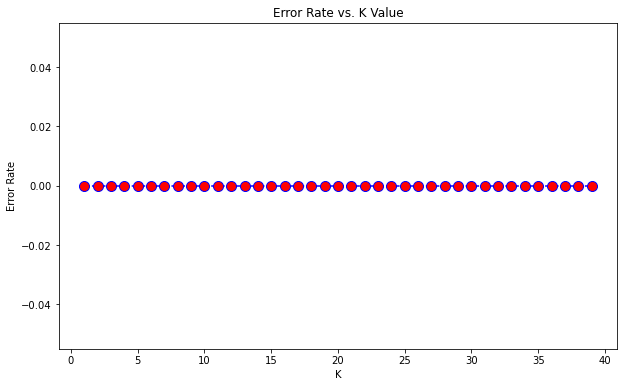

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(XX_train,yy_train)
pred = knn.predict(XX_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(yy_test,predd))
print('\n')
print(classification_report(yy_test,pred))

WITH K=1


[[  0  81]
 [  0 864]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       864

    accuracy                           1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945



In [63]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(XX_train,yy_train)
pred = knn.predict(XX_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(yy_test,predd))
print('\n')
print(classification_report(yy_test,predd))

WITH K=23


[[  0  81]
 [  0 864]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.91      1.00      0.96       864

    accuracy                           0.91       945
   macro avg       0.46      0.50      0.48       945
weighted avg       0.84      0.91      0.87       945



C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amant\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:



#100% accuracy on all models .........